
# Project: Investigate a Dataset (No-show appointments)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction


In this dataset we will see an appointment for patient and we will try to know what makes the patient come on the appointment date? What is the overall no-show rate?  Which days of the week does the patient come to the appointment?does sending an sms to the patient will encourage them to attend their appointment?what is the ratio of each age segment?does the appointment in the same day effect the attendance?

In [1]:
# get the needed liberary
import pandas as pd
import numpy as np
import seaborn as sns


% matplotlib inline
% pylab inline
sns.set(style="whitegrid", color_codes=True)

Populating the interactive namespace from numpy and matplotlib


<a id='wrangling'></a>
## Data Wrangling



### General Properties

Import the csv files to start explore and view the file and the data types

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


preview the dataset and explore the data

In [3]:
# preview the data set
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589980e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262960e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679510e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841190e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No



### Data Cleaning (Replace this with more specific notes!)

First of all we will check for any duplication or any missing values but as we saw from info there are no missing values


#### Check for Duplication

There are no duplicate found in the dataset

In [4]:
# Check for duplication
df.duplicated().sum()

0

There are some patient who schedule more than one appointment

In [5]:
# Check Patient No of visit
df.PatientId.duplicated().sum()

48783

converting the data type for ScheduledDay and AppointmentDay to be datetime as its seems to be an object as we see from the info

In [6]:
# convert string to date time for AppointmentDay and ScheduledDay
df['ScheduledDay'] =  pd.to_datetime(df['ScheduledDay'], format='%Y-%m-%d')
df['AppointmentDay'] =  pd.to_datetime(df['AppointmentDay'], format='%Y-%m-%d')

df['ScheduledDate'] =  df['ScheduledDay'].dt.date.astype('datetime64[ns]')

df['AppointmentDayName'] = df.AppointmentDay.dt.weekday_name


converting the datatype for the No-show to be boolean

In [7]:
# Change the datatype for the No-show from string to boolean
df =df.replace({'No-show': {'Yes': True, 'No': False}})

#### Checking any inconvenient data

We will check any strange age 

In [8]:
# Check strange Age
df.query('Age<0')

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,ScheduledDate,AppointmentDayName
99832,4.659430e+14,5775010,F,2016-06-06 08:58:13,2016-06-06,-1,ROMÃO,0,0,0,0,0,0,False,2016-06-06,Monday


There are one raw with strange Age

We will check any appointment date that happend before its scheduled 


In [9]:
df['DaysBeforeAppointment'] =  (df['AppointmentDay'] - df['ScheduledDate']).dt.days

In [10]:
# Check strange Age appointment
df.query('DaysBeforeAppointment<0')

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,ScheduledDate,AppointmentDayName,DaysBeforeAppointment
27033,7.839270e+12,5679978,M,2016-05-10 10:51:53,2016-05-09,38,RESISTÊNCIA,0,0,0,0,1,0,True,2016-05-10,Monday,-1
55226,7.896290e+12,5715660,F,2016-05-18 14:50:41,2016-05-17,19,SANTO ANTÔNIO,0,0,0,0,1,0,True,2016-05-18,Tuesday,-1
64175,2.425230e+13,5664962,F,2016-05-05 13:43:58,2016-05-04,22,CONSOLAÇÃO,0,0,0,0,0,0,True,2016-05-05,Wednesday,-1
71533,9.982320e+14,5686628,F,2016-05-11 13:49:20,2016-05-05,81,SANTO ANTÔNIO,0,0,0,0,0,0,True,2016-05-11,Thursday,-6
72362,3.787480e+12,5655637,M,2016-05-04 06:50:57,2016-05-03,7,TABUAZEIRO,0,0,0,0,0,0,True,2016-05-04,Tuesday,-1


We found that five records has an appointment then has a schedual

Removing strange data so that we could start our work on a clean dataset

In [11]:
# drop the inconvenient data
# how can I schedual an appointent after the appointment ?????? (why the appointment date is before the schedual)

df.drop(df[df['DaysBeforeAppointment']<0].index, inplace=True)

# there is no age below zero(Zero Age meaning a baby who didn't complete first year(New Born))
df.drop(df[df['Age']<0].index, inplace=True)

In [12]:
df.shape

(110521, 17)

confirming that every thing converted successfully

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110521 entries, 0 to 110526
Data columns (total 17 columns):
PatientId                110521 non-null float64
AppointmentID            110521 non-null int64
Gender                   110521 non-null object
ScheduledDay             110521 non-null datetime64[ns]
AppointmentDay           110521 non-null datetime64[ns]
Age                      110521 non-null int64
Neighbourhood            110521 non-null object
Scholarship              110521 non-null int64
Hipertension             110521 non-null int64
Diabetes                 110521 non-null int64
Alcoholism               110521 non-null int64
Handcap                  110521 non-null int64
SMS_received             110521 non-null int64
No-show                  110521 non-null bool
ScheduledDate            110521 non-null datetime64[ns]
AppointmentDayName       110521 non-null object
DaysBeforeAppointment    110521 non-null int64
dtypes: bool(1), datetime64[ns](3), float64(1), int64(9), o

<a id='eda'></a>
## Exploratory Data Analysis



### Research Question 1 (Overall No show ratio)

First of all and before we go any deep in this dataset we need to measure the overall attendance and it's ratio for the entire patient visits

In [14]:
noAttendanceMean = df['No-show'].mean()

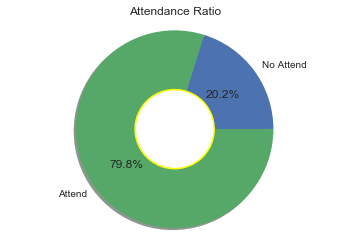

In [15]:
labels =  'No Attend','Attend'
sizes = [noAttendanceMean, 1-noAttendanceMean]

explode = (0, 0)  # explode a slice if required

plt.pie(sizes, explode=explode, labels=labels, 
        autopct='%1.1f%%', shadow=True)
        
#draw a circle at the center of pie to make it look like a donut
centre_circle = plt.Circle((0,0),0.40,color='yellow', fc='white',linewidth=1.55)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('Attendance Ratio')
# Set aspect ratio to be equal so that pie is drawn as a circle.
plt.axis('equal')
plt.show() 

As we see from this data that the ratio of the attendance is around 80% that's mean any scheduled appointment have a risk of 20 % the patient will not come for his appointment

### Research Question 2 (Gender Appointment!)

Lets go  deeper and see if one gender has more commitment to come and show for his appointment and the ratio of each gender who reserve the schedule and attend his appointment

In [16]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.
GenderAppoint = df.groupby(['Gender','No-show'])['AppointmentID'].count().unstack()
print(GenderAppoint)


No-show  False  True 
Gender               
F        57245  14591
M        30962   7723


some statistics of the attendance ratio and total number of the appointments per gender and the ratio of each gender

In [17]:
TTL_Appoint = GenderAppoint[0]+GenderAppoint[1]
AttendanceRatio = GenderAppoint[0]/(GenderAppoint[1]+GenderAppoint[0])

print(AttendanceRatio)
print(TTL_Appoint)
print(TTL_Appoint/TTL_Appoint.sum())


Gender
F    0.796885
M    0.800362
dtype: float64
Gender
F    71836
M    38685
dtype: int64
Gender
F    0.649976
M    0.350024
dtype: float64


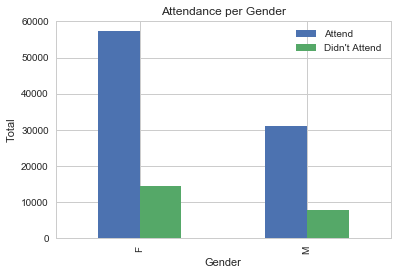

In [18]:
GenderAppoint.plot(kind = 'bar', title = 'Attendance per Gender')
plt.ylabel('Total')
plt.xlabel('Gender')
plt.legend(['Attend',"Didn't Attend"]);
plt.show();

This graph shows us the total number of attend and do not attend for each gender and as we see that the ratio of male 35% are below the female 65% for the overall reservations and the attendace ratio for both are around 80%

### Research Question 3 (Day of the week Appointment!)

lets try to see if there are any spacific day of the week that the patient mostly didn't attend there appointment 

In [19]:
AppointDay = df.groupby(['AppointmentDayName','No-show'])['PatientId'].count().unstack()
print(AppointDay)

No-show             False  True 
AppointmentDayName              
Friday              14982   4037
Monday              18024   4689
Saturday               30      9
Thursday            13909   3337
Tuesday             20488   5150
Wednesday           20774   5092


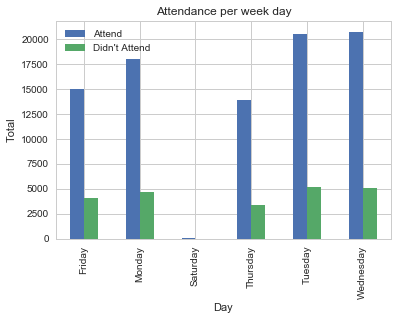

In [20]:
AppointDay.plot(kind = 'bar', title = 'Attendance per week day')
plt.ylabel('Total')
plt.xlabel('Day')
plt.legend(['Attend',"Didn't Attend"]);
plt.show();

In [21]:
AppointDayNoShow = df.groupby(['AppointmentDayName'])['No-show'].mean()

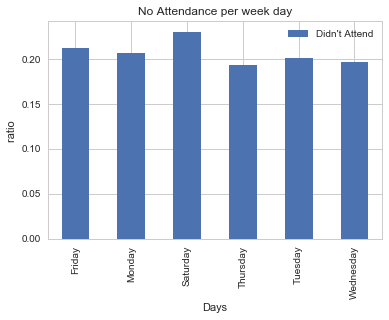

In [22]:
AppointDayNoShow.plot(kind = 'bar', title = 'No Attendance per week day')
plt.ylabel('ratio ')
plt.xlabel('Days')
plt.legend(["Didn't Attend"]);
plt.show();

From the above graphs we can see that the rush days are in Tuesday and Wednesday while Saturday seems to be the day off except some cases and if we try to see the ratio of the patient who didn't attend among this data we will see that saturday is the most day they didn't attend and if we exclude it as it seems to have an issue as it suppose to be a day off then we will find that friday and Monday have the highst ratio of didn't attend patient

### Research Question 4  (Does sending a SMS will effect the Attendance!)

There is a very important solution that could help the patient and remind him for his appointment so that he could attend his appointment

In [23]:
def make_autopct(sizes):
    def my_autopct(pct):
        total = sum(sizes)
        val = int(round(pct*total/100.0))
        return '{p:.2f}%  ({v:d})'.format(p=pct,v=val)
    return my_autopct

In [24]:
sms = df.groupby(['SMS_received','No-show'],as_index=False)['PatientId'].count()
print(sms)
print(list(sms.SMS_received))
print(list(sms['No-show']))
print(list(sms.PatientId))

   SMS_received  No-show  PatientId
0             0    False      62509
1             0     True      12530
2             1    False      25698
3             1     True       9784
[0, 0, 1, 1]
[False, True, False, True]
[62509, 12530, 25698, 9784]


In [25]:
sms = df.groupby(['SMS_received','No-show'])['PatientId'].count().unstack()
print(sms)


No-show       False  True 
SMS_received              
0             62509  12530
1             25698   9784


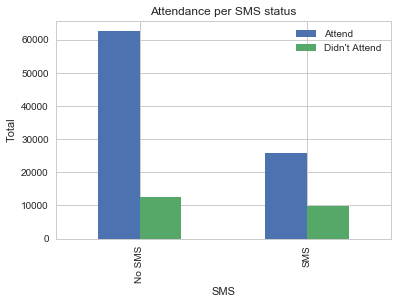

In [26]:

sms.plot(kind = 'bar', title = 'Attendance per SMS status' )
plt.ylabel('Total')
plt.xlabel('SMS')
label = ["No SMS", "SMS"]
plt.xticks(list(sms.keys()), label)
plt.legend(['Attend',"Didn't Attend"]);
plt.show();

This graph shows that the SMS system is not working frequently as its data seems to be lower than the usual system (without the SMS reminder system) but over all it seems that it didn't solves the attendace and we shall invistgate it more

In [27]:
s1 = df.groupby(['SMS_received'])['No-show'].mean()


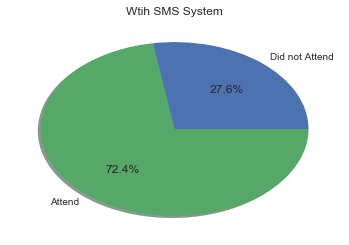

In [28]:
labels = ['Did not Attend','Attend']
sizes = [s1[1],1-s1[1]]

plt.pie(sizes, labels=labels, autopct='%1.1f%%',shadow=True)
plt.title('Wtih SMS System')
plt.show()

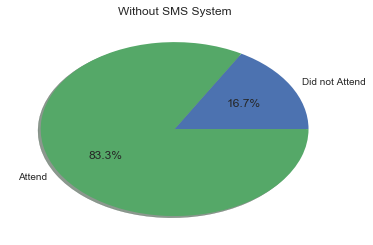

In [29]:
labels = ['Did not Attend','Attend']
sizes = [s1[0],1-s1[0]]

plt.pie(sizes, labels=labels, autopct='%1.1f%%',shadow=True)
plt.title('Without SMS System')
plt.show()

In the last two graphs we see the SMS system didn't improves the attendance of the patient as it makes the ratio of the missing appointment getting higher and the attendance decreased from 83% to 72%

### Research Question 5  (Does Age will effect the Attendance!)

In this part I'll try to know the attendance for each age segmen and I'll divide it to five age segments 
1. Baby [0:2] years
2. Child [3:12] years
3. Teen [13:18] years
4. Youth [18:40] years
5. Old 41 and above years

In [30]:
# I substitut this function with the pandas cut function as the review said and It was very useful
# make group for each age segment
# def AgeGroup(Age):
#     if Age <3:
#         return 'Baby'
#     elif Age >= 3 and Age <12:
#         return 'Child'
#     elif Age >= 12 and Age <18:
#         return 'Teen'
#     elif Age >= 18 and Age <40:
#         return 'Youth'
#     elif Age >= 40:
#         return 'Old'
    
# AgeGroupNoShow = df.groupby(df['Age'].apply(AgeGroup))['No-show'].mean()*df['PatientId'].count()

In [31]:
bins = [df['Age'].min(),2,12,18,40,df['Age'].max()]
labels=["Baby", "Child", "Teen",'Youth','Old']
AgeGroupSegments = pd.cut(df['Age'], labels=labels ,bins = bins)
AgeGroupNoShow = df.groupby(AgeGroupSegments)['No-show'].mean()*df['PatientId'].count()

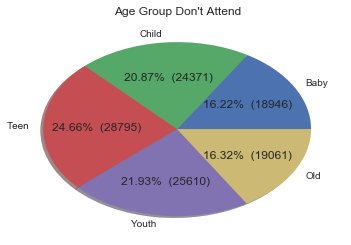

In [32]:
labels = list(AgeGroupNoShow.keys())
sizes = list(AgeGroupNoShow)

plt.pie(sizes, labels=labels, autopct=make_autopct(sizes),shadow=True)
plt.title("Age Group Don't Attend")
plt.show()

This graph shows us that the teen age has the highest ratio of didn't show for the appointment on the other hand 
Baby and Old group have better attendance 

### Research Question 6  (Does the appointment in the same day will effect the attendance!)

I try to see if we get an appointment in the same day will effect the attendance as the patient will keep in mind that he has an appintment in the same day so they will have better chances not to forget the appointment 

In [33]:
# make group for the number of days before the appointment
def DayBefAppointGroup(DaysBeforeAppointment):
    if DaysBeforeAppointment < 1:
        return 'Same Day'
    elif DaysBeforeAppointment >= 1 and DaysBeforeAppointment <=10:
        return 'Within 10 Days'

    elif DaysBeforeAppointment > 10 :
        return 'Over 10 Days'

In [34]:
DayBefAppoint = df.groupby(df['DaysBeforeAppointment'].apply(DayBefAppointGroup))['No-show'].mean()

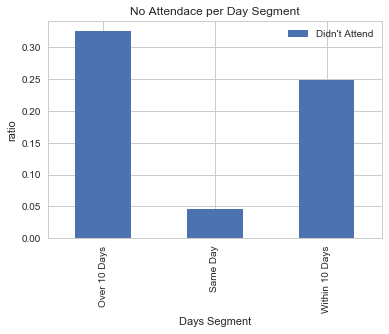

In [35]:
DayBefAppoint.plot(kind = 'bar', title = 'No Attendace per Day Segment')
plt.ylabel('ratio')
plt.xlabel('Days Segment')
plt.legend(["Didn't Attend"]);
plt.show();

As we see the attendance is very good if the patient schedule the appointment in the same day as ra ratio of didn't attend didn't exceed 5% and as the days continue to get bigger the chances are getting bigger for the patient to not come for his appointment (maybe because he found another doctor or he forget about his appointment)

Having the appointment in the same day will one of the best ways to insure the patiant attend his appointment

<a id='conclusions'></a>
## Conclusions

From this data we can see that most of the patient are Females and both genders have the same ratio of didn't come for the appointment, the number of patient who didn't come for the appointment are around 20 % and after try to remind them with the SMS it didn't really solve this issue but it makes it worst and better to remove this system on the other hand if the appointment are in the same day it has better chances to better attendance and  baby ages and older ages olso has better chance to attend the appointment olso Tusday is the most day with the attendace and patient come for the appointment.<br>
I found some strange data in this dataset some ages are below zero and some schedual date comes after the appointment date so I remove it to work on a clean dataset

Resources:
https://pandas.pydata.org/pandas-docs/stable/generated/pandas.core.groupby.DataFrameGroupBy.agg.html
https://chrisalbon.com/python/pandas_apply_operations_to_groups.html
https://www.youtube.com/watch?v=reTeOfEebeA
https://stackoverflow.com/questions/24444251/pandas-groupby-and-unstack-to-create-feature-vector-for-classification
https://stackoverflow.com/questions/39409180/create-two-aggregate-columns-by-group-by-pandas
http://pandas.pydata.org/pandas-docs/stable/generated/pandas.cut.html